In [3]:
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
from IPython.display import Image, display
import data_extraction.get_indices as get_indices


### Sanbox for any head angle analysis 

In [4]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
# data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # Tom laptop
# data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # octagon laptop
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json']
json_filenames = r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json'
# json_filenames = [r'third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json']

In [5]:
df, trials_list = prepare_data.prepare_data(data_folder, json_filenames, combine=True)

filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.


In [6]:
# local variables
# trial_num = 56, player_id =1
trial_num = 15
# player_id = get_indices.get_trigger_activators(trials_list)[trial_num]
player_id = 0

In [8]:
trial = trials_list[trial_num]

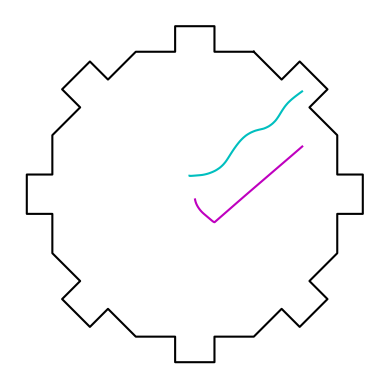

In [9]:
# plot both trajectories from a single trial
ax = plot_octagon.plot_octagon()
plot_trajectory.plot_trial_trajectory(ax, trial=trial)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

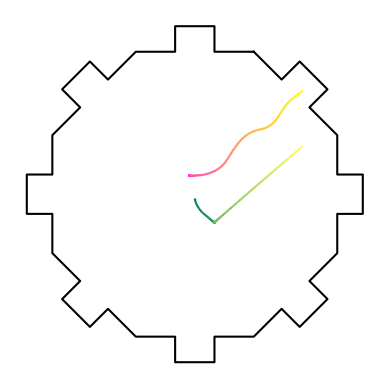

In [10]:
ax = plot_octagon.plot_octagon()
plot_trajectory.plot_trial_trajectory_colour_map(ax, trial=trial)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()


In [12]:
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=player_id)
headangles = trajectory_vectors.extract_trial_player_headangles(trial=trial, player_id=player_id)
trial_player_headangles =  trajectory_headangle.get_player_headangle_vectors_for_trial(headangles)
trial_player_headangles_smoothed = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trial(headangles, window_size=5)


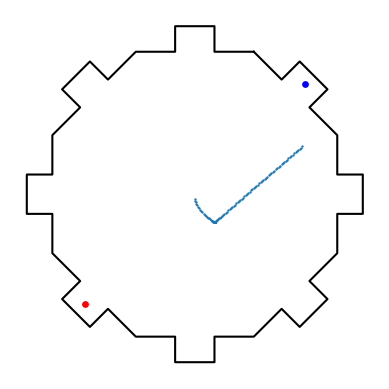

In [13]:
# plot only a single trajectory from this trial
alcove_coordinates = plot_octagon.return_alcove_centre_points()
walls = get_indices.get_walls(trial=trial)
wall1_index = walls[0] - 1
wall2_index = walls[1] - 1


ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)
plt.scatter(alcove_coordinates[0,wall1_index], alcove_coordinates[1,wall1_index], c='r', s=15)
plt.scatter(alcove_coordinates[0,wall2_index], alcove_coordinates[1,wall2_index], c='b', s=15)


for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

0.028440875932574272 -0.6142868399620056


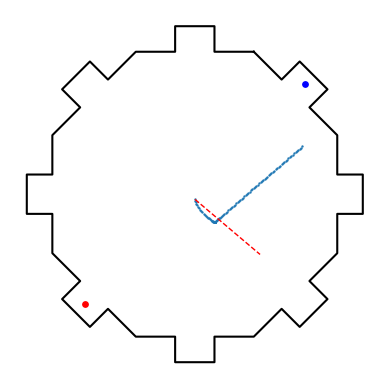

In [14]:
# example plotting head angle direction vector
start_index=0
x_start = trajectory[0,start_index]
y_start = trajectory[1,start_index]
x_gradient = trial_player_headangles_smoothed[0,start_index]
y_gradient = trial_player_headangles_smoothed[1,start_index]
vector_length = 10

start = [x_start, y_start]
print(x_start, y_start)
end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]

head_direction_vector_coordinates = np.array(list(zip(start,end)))

ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)
ax.plot(head_direction_vector_coordinates[0,:], head_direction_vector_coordinates[1,:], c='r', linestyle='--', linewidth=1)

# plot Red and Blue dots to identify the High and Low walls respectively
walls = get_indices.get_walls(trial)
wall1_index = walls[0] - 1
wall2_index = walls[1] - 1
alcove_coordinates = plot_octagon.return_alcove_centre_points()
plt.scatter(alcove_coordinates[0,wall1_index], alcove_coordinates[1,wall1_index], c='r', s=15)
plt.scatter(alcove_coordinates[0,wall2_index], alcove_coordinates[1,wall2_index], c='b', s=15)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()


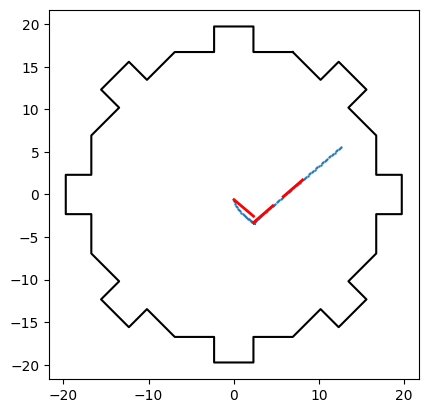

In [15]:
## Find the average head angle vector at equally-spaced points throughout the trajectory 
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

for time_index in range(0, trial_player_headangles_smoothed.shape[1], 40):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = trial_player_headangles_smoothed[0,time_index]
    y_gradient = trial_player_headangles_smoothed[1,time_index]
    vector_length = 3
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_head_angle_vector_coordinates = np.array(list(zip(start,end)))
    ax.plot(this_head_angle_vector_coordinates[0,:], this_head_angle_vector_coordinates[1,:], c='r', linewidth=2)

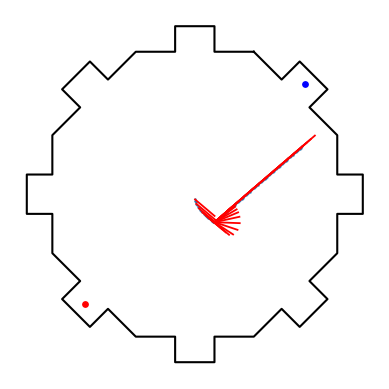

In [16]:
## Find the average head angle vector at all points throughout trajectory 
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

for time_index in range(0, trial_player_headangles_smoothed.shape[1],3):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = trial_player_headangles_smoothed[0,time_index]
    y_gradient = trial_player_headangles_smoothed[1,time_index]
    vector_length = 3
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_head_angle_vector_coordinates = np.array(list(zip(start,end)))
    ax.plot(this_head_angle_vector_coordinates[0,:], this_head_angle_vector_coordinates[1,:], c='r', linewidth=1.3)

plt.scatter(alcove_coordinates[0,wall1_index], alcove_coordinates[1,wall1_index], c='r', s=15)
plt.scatter(alcove_coordinates[0,wall2_index], alcove_coordinates[1,wall2_index], c='b', s=15)


for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

In [18]:
# Find the angles between the head direction and the walls for each timepoint in the trajectory
thetas_trajectory = trajectory_headangle.head_angle_to_walls_throughout_trajectory(trajectory,
                                                                                   headangles,
                                                                                   window_size=10, num_walls=8)

thetas_trajectory = np.rad2deg(thetas_trajectory)

In [19]:
# compare the headangle vector and player-to-alcove vectors for a run of timepoints
# smoothed_trial_player_headangles = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trial(trial_player_headangles,
#                                                                                                               window_size=10)
player_to_alcove_vectors = trajectory_vectors.get_player_to_alcove_direction_vectors_for_trajectory(trajectory,
                                                                                     num_walls=8)
trial_player_headangles_smoothed[:,110:120]

array([[0.75872783, 0.75841159, 0.75809535, 0.75777911, 0.75746288,
        0.75722551, 0.75714634, 0.75690869],
       [0.65140759, 0.6517752 , 0.65214282, 0.65251044, 0.65287806,
        0.65315347, 0.65324523, 0.65352031]])

In [20]:
player_to_alcove_vectors[:,1,110:120]

array([[2.20801593, 2.04982902, 1.8914323 , 1.73331405, 1.55415679,
        1.39625789, 1.21784164, 1.05994178, 0.90192462, 0.74415637],
       [8.95318938, 8.81744434, 8.68151904, 8.54583265, 8.39182569,
        8.25588371, 8.10202695, 7.96586181, 7.82959605, 7.6935444 ]])

In [156]:
### CHECK VISIBILITY OF WALLS ACROSS TRIAL ###

In [157]:
## for each timepoint, for each wall, identify if wall periphery is within +/-45 degrees of FoV centre ##

In [158]:
# get octagon index coordinates, and check whether the CW or CCW vertex of each wall
# (the opposite of whether the wall is CW or CCW w.r.t the player headangle vector)
# is visible at each timepoint, for each wall


In [21]:
## 1. get octagon vertex coordinates and process

# get octagon vertex coordinates
octagon_vertex_coords = plot_octagon.calculate_coordinates(vertex=True)

# convert to array rows as x coords, y coords
octagon_vertex_coords = np.vstack([octagon_vertex_coords[0], octagon_vertex_coords[1]]) 

# remove repeated first coordinate
octagon_vertex_coords = octagon_vertex_coords[:,:-1]

# rearrange array so that north wall is at the beginning
octagon_vertex_coords = np.hstack([octagon_vertex_coords[:,-1:], octagon_vertex_coords[:,:-1]])

In [22]:
## 2. create 2 separate arrays from octagon vertex coordinates, one which has the CW coordinates
#     for the wall at the wall's index and one that has the CCW coordinates

# create an array for 'clockwise' and 'counterclockwise' values,
# where CW is just offset by 1
CW_octagon_vertex_coords = octagon_vertex_coords
CCW_octagon_vertex_coords = np.hstack([octagon_vertex_coords[:,1::], octagon_vertex_coords[:,0:1:]])



In [23]:
CW_octagon_vertex_coords

array([[ -6.92848354,   6.92848354,  16.72683894,  16.72683894,
          6.92848354,  -6.92848354, -16.72683894, -16.72683894],
       [ 16.72683894,  16.72683894,   6.92848354,  -6.92848354,
        -16.72683894, -16.72683894,  -6.92848354,   6.92848354]])

In [24]:
CCW_octagon_vertex_coords

array([[  6.92848354,  16.72683894,  16.72683894,   6.92848354,
         -6.92848354, -16.72683894, -16.72683894,  -6.92848354],
       [ 16.72683894,   6.92848354,  -6.92848354, -16.72683894,
        -16.72683894,  -6.92848354,   6.92848354,  16.72683894]])

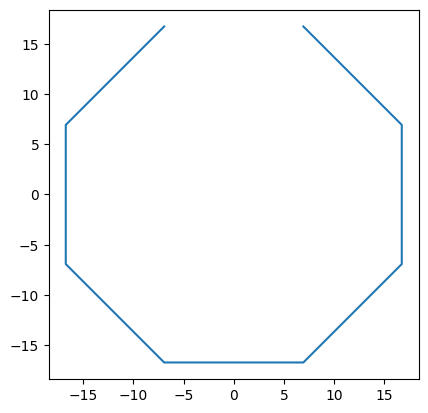

In [25]:
plt.plot(CCW_octagon_vertex_coords[0,:], CCW_octagon_vertex_coords[1,:])
plt.gca().set_aspect(1.)

In [26]:
## 3. access the smoothed player headangles vectors and player to alcove vectors for the trajectory

# smoothed_trial_player_headangles = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trial(trial_player_headangles,
#                                                                                                               window_size=10)
player_to_alcove_vectors = trajectory_vectors.get_player_to_alcove_direction_vectors_for_trajectory(trajectory,
                                                                                     num_walls=8)

In [27]:
player_to_alcove_vectors.shape

(2, 8, 123)

In [28]:
## 4.  calculate the cross-product between head angle vector and alcove vectors for each time point,
#      to identify if a wall is CCW or CW of the player
#      positive values mean that the alcove of this wall is CCW of the head angle vector

num_walls = 8
cross_products_wall_headangle = np.zeros([num_walls,trial_player_headangles_smoothed.shape[1]])
for timepoint in range(trial_player_headangles_smoothed.shape[1]):
    headangle_vector_x_coord = trial_player_headangles_smoothed[0, timepoint]
    headangle_vector_y_coord = trial_player_headangles_smoothed[1, timepoint]
    
    for wall_num in range(num_walls):
        wall_vector_x_coord = player_to_alcove_vectors[0, wall_num, timepoint]
        wall_vector_y_coord = player_to_alcove_vectors[1, wall_num, timepoint]
        cross_product_this_wall = headangle_vector_x_coord*wall_vector_y_coord - headangle_vector_y_coord*wall_vector_x_coord
        cross_products_wall_headangle[wall_num,timepoint] = cross_product_this_wall

In [29]:
## 5. create a boolean array to record whether each wall is CW or CCW of player head angle at each timepoint
#     clockwise is True
wall_is_clockwise = cross_products_wall_headangle < 0

In [30]:
wall_is_clockwise[:,10]

array([False, False, False,  True,  True,  True,  True, False])

In [31]:
## 6. Use the defined CW and CCW values for the wall coordinates and fill an array based on the boolean array
#     this represents the new 'player to wall vectors' array

wall_coords_cross_product_dependent = np.zeros((*wall_is_clockwise.shape, 2)) # add a 3rd dimension of size
                                                                                 # 2 to store x/y coordinates

# reshape and broadcast the x and y coordinates of octagon_vertex_coords to fit np.where
CW_octagon_vertex_coords_x = CW_octagon_vertex_coords[0].reshape(8,1)
CW_octagon_vertex_coords_x = CW_octagon_vertex_coords_x * np.ones((8,wall_is_clockwise.shape[1]))

CCW_octagon_vertex_coords_x = CCW_octagon_vertex_coords[0].reshape(8,1)
CCW_octagon_vertex_coords_x = CCW_octagon_vertex_coords_x * np.ones((8,wall_is_clockwise.shape[1]))

CW_octagon_vertex_coords_y = CW_octagon_vertex_coords[1].reshape(8,1)
CW_octagon_vertex_coords_y = CW_octagon_vertex_coords_y * np.ones((8,wall_is_clockwise.shape[1]))

CCW_octagon_vertex_coords_y = CCW_octagon_vertex_coords[1].reshape(8,1)
CCW_octagon_vertex_coords_y = CCW_octagon_vertex_coords_y * np.ones((8,wall_is_clockwise.shape[1]))


# Verify the shape of wall_angular_direction
print("wall_is_clockwise shape:", wall_is_clockwise.shape)

# Verify the shapes and contents of CW and CCW octagon vertex coordinates
print("CW_octagon_vertex_coords_x shape:", CW_octagon_vertex_coords_x.shape)
print("CCW_octagon_vertex_coords_x shape:", CCW_octagon_vertex_coords_x.shape)
print("CW_octagon_vertex_coords contents:", CW_octagon_vertex_coords)
print("CCW_octagon_vertex_coords contents:", CCW_octagon_vertex_coords)


wall_coords_cross_product_dependent[:,:,0] = np.where(wall_is_clockwise,
                                                      CW_octagon_vertex_coords_x,
                                                      CCW_octagon_vertex_coords_x)
wall_coords_cross_product_dependent[:,:,1] = np.where(wall_is_clockwise,
                                                      CW_octagon_vertex_coords_y,
                                                      CCW_octagon_vertex_coords_y)



wall_is_clockwise shape: (8, 118)
CW_octagon_vertex_coords_x shape: (8, 118)
CCW_octagon_vertex_coords_x shape: (8, 118)
CW_octagon_vertex_coords contents: [[ -6.92848354   6.92848354  16.72683894  16.72683894   6.92848354
   -6.92848354 -16.72683894 -16.72683894]
 [ 16.72683894  16.72683894   6.92848354  -6.92848354 -16.72683894
  -16.72683894  -6.92848354   6.92848354]]
CCW_octagon_vertex_coords contents: [[  6.92848354  16.72683894  16.72683894   6.92848354  -6.92848354
  -16.72683894 -16.72683894  -6.92848354]
 [ 16.72683894   6.92848354  -6.92848354 -16.72683894 -16.72683894
   -6.92848354   6.92848354  16.72683894]]


In [32]:
CCW_octagon_vertex_coords_x[3,1], CCW_octagon_vertex_coords_y[3,1], 

(np.float64(6.9284835429699525), np.float64(-16.726838936116845))

In [33]:
wall_coords_cross_product_dependent[3,10,0]

np.float64(16.726838936116845)

In [34]:
CW_octagon_vertex_coords

array([[ -6.92848354,   6.92848354,  16.72683894,  16.72683894,
          6.92848354,  -6.92848354, -16.72683894, -16.72683894],
       [ 16.72683894,  16.72683894,   6.92848354,  -6.92848354,
        -16.72683894, -16.72683894,  -6.92848354,   6.92848354]])

In [35]:
CCW_octagon_vertex_coords

array([[  6.92848354,  16.72683894,  16.72683894,   6.92848354,
         -6.92848354, -16.72683894, -16.72683894,  -6.92848354],
       [ 16.72683894,   6.92848354,  -6.92848354, -16.72683894,
        -16.72683894,  -6.92848354,   6.92848354,  16.72683894]])

In [36]:
wall_coords_cross_product_dependent[0, 10, :] - trajectory[:, 10]

array([ 5.88277071, 19.01568209])

In [38]:
wall_coords_cross_product_dependent_old = wall_coords_cross_product_dependent

In [39]:
def get_octagon_vertex_coordinates():
    ''' Return octagon vertex coordinates as a 2D array of shape 2*8
        The first point is the CCW vertex of wall 1 '''
    
    # get octagon vertex coordinates
    octagon_vertex_coords = plot_octagon.calculate_coordinates(vertex=True)
    
    # convert to array rows as x coords, y coords
    octagon_vertex_coords = np.vstack([octagon_vertex_coords[0], octagon_vertex_coords[1]]) 
    
    # remove repeated first coordinate
    octagon_vertex_coords = octagon_vertex_coords[:,:-1]
    
    # rearrange array so that north wall is at the beginning
    octagon_vertex_coords = np.hstack([octagon_vertex_coords[:,-1:], octagon_vertex_coords[:,:-1]])

    
    return octagon_vertex_coords
    

In [40]:
def get_CW_CCW_vertex_coords():
    ''' Take a 2*8 array of octagon vertex coordinates and return two arrays
        First is the 'clockwise' array, where the first column is the CCW vertex of wall 1
        Second is the 'counterlockwise' array, where the first column is the CW vertex of wall 1
        Both returned arrays are still shape 2*8 '''

    CW_octagon_vertex_coords = octagon_vertex_coords
    CCW_octagon_vertex_coords = np.hstack([octagon_vertex_coords[:,1::], octagon_vertex_coords[:,0:1:]])

    return CW_octagon_vertex_coords, CCW_octagon_vertex_coords

In [41]:
def calculate_cross_product(smoothed_player_headangles_trial, player_to_alcove_vectors, num_walls=8):
    ''' Calculate the cross product between the head angle vector and the alcove vectors for each time
        point in a trajectory
        Cross product is positive if the second vector is CCW of the first, and negative if the second
        vector is CW of the first
        Return a num_walls*trajectory_length-1 shaped array '''

    cross_products_wall_headangle = np.zeros([num_walls,smoothed_player_headangles_trial.shape[1]])
    for timepoint in range(smoothed_player_headangles_trial.shape[1]):
        headangle_vector_x_coord = smoothed_player_headangles_trial[0, timepoint]
        headangle_vector_y_coord = smoothed_player_headangles_trial[1, timepoint]
        
        for wall_num in range(num_walls):
            wall_vector_x_coord = player_to_alcove_vectors[0, wall_num, timepoint]
            wall_vector_y_coord = player_to_alcove_vectors[1, wall_num, timepoint]
            cross_product_this_wall = headangle_vector_x_coord*wall_vector_y_coord - headangle_vector_y_coord*wall_vector_x_coord
            cross_products_wall_headangle[wall_num,timepoint] = cross_product_this_wall

    return cross_products_wall_headangle
    

In [42]:
def is_wall_clockwise_of_player(cross_products_wall_headangle):
    ''' Return a boolean array of shape num_walls*player_headangles_trial.shape[1]
        which is True for when the wall is clockwise of the player's current headangle vector '''

    return cross_products_wall_headangle < 0


In [43]:
def get_closest_wall_section_coords_trajectory(wall_is_clockwise, CW_octagon_vertex_coords, CCW_octagon_vertex_coords):
    ''' Taking the clockwise and counterclockwise octagon vertex coordinates (i.e., the coordinates of the
        vertices of each wall, 1-8, that would be seen first if rotating clockwise or counterclockwise)
        Create an array of shape wall_angular_direction.shape*2 that records the x/y coordinates of the wall
        for all timepoints, being either CW or CCW coordinate dictated by np.where(wall_is_clockwise)
        Where wall_is_clockwise is true when the wall is clockwise of the current headangle vector '''
    
    
    wall_coords_cross_product_dependent = np.zeros((*wall_is_clockwise.shape, 2)) # add a 3rd dimension of size
                                                                                     # 2 to store x/y coordinates
    
    # reshape and broadcast the x and y coordinates of octagon_vertex_coords to fit np.where
    CW_octagon_vertex_coords_x = CW_octagon_vertex_coords[0].reshape(8,1)
    CW_octagon_vertex_coords_x = CW_octagon_vertex_coords_x * np.ones((8,wall_is_clockwise.shape[1]))
    
    CCW_octagon_vertex_coords_x = CCW_octagon_vertex_coords[0].reshape(8,1)
    CCW_octagon_vertex_coords_x = CCW_octagon_vertex_coords_x * np.ones((8,wall_is_clockwise.shape[1]))
    
    CW_octagon_vertex_coords_y = CW_octagon_vertex_coords[1].reshape(8,1)
    CW_octagon_vertex_coords_y = CW_octagon_vertex_coords_y * np.ones((8,wall_is_clockwise.shape[1]))
    
    CCW_octagon_vertex_coords_y = CCW_octagon_vertex_coords[1].reshape(8,1)
    CCW_octagon_vertex_coords_y = CCW_octagon_vertex_coords_y * np.ones((8,wall_is_clockwise.shape[1]))
    
    
    # # Verify the shape of wall_angular_direction
    # print("wall_is_clockwise shape:", wall_is_clockwise.shape)
    
    # # Verify the shapes and contents of CW and CCW octagon vertex coordinates
    # print("CW_octagon_vertex_coords_x shape:", CW_octagon_vertex_coords_x.shape)
    # print("CCW_octagon_vertex_coords_x shape:", CCW_octagon_vertex_coords_x.shape)
    # print("CW_octagon_vertex_coords contents:", CW_octagon_vertex_coords)
    # print("CCW_octagon_vertex_coords contents:", CCW_octagon_vertex_coords)
    
    
    wall_coords_cross_product_dependent[:,:,0] = np.where(wall_is_clockwise,
                                                          CW_octagon_vertex_coords_x,
                                                          CCW_octagon_vertex_coords_x)
    wall_coords_cross_product_dependent[:,:,1] = np.where(wall_is_clockwise,
                                                          CW_octagon_vertex_coords_y,
                                                          CCW_octagon_vertex_coords_y)

    return wall_coords_cross_product_dependent

In [44]:
def get_player_to_closest_wall_section_direction_vectors_for_trajectory(trajectory,
                                                                        wall_coords_cross_product_dependent,
                                                                        num_walls=8):
    ''' Calculate the direction vector between player and the angularly closest wall coordinate (of each wall)
        Input requires the smoothed head angle vectors of the player for a full trajectory,
        and the wall coordinates to use, dependent on the current head angle
        The first array must be shape 2*timepoints, the second array must be
        shaped wall_num*timepoints*2
        Returns a 3-dimensional array of shape 2*num_walls*trajectory.shape[1] '''
    
    # calculate the vector between the closest wall section point and current player location
    vector_to_closest_wall_sections = np.zeros([2, num_walls, wall_coords_cross_product_dependent.shape[1]])
    for time_index in range(wall_coords_cross_product_dependent.shape[1]): # for each timepoint in trajectory
        player_x_loc = trajectory[0,time_index]
        player_y_loc = trajectory[1,time_index]
    
        for wall_num in range(num_walls): # for each wall
            vector_to_closest_wall_section = wall_coords_cross_product_dependent[wall_num, time_index, :] - trajectory[:, time_index]
            vector_to_closest_wall_sections[:,wall_num,time_index] = vector_to_closest_wall_section

    return vector_to_closest_wall_sections

In [45]:
## 7. repeat head_angle_to_walls_throughout_trajectory but this time with the new array for 
#     player-to-wall vectors that chooses the CCW or CW coordinates depending on the current headangle

def head_angle_to_closest_wall_section_throughout_trajectory(trajectory, head_angle_vector_array_trajectory,
                                                             wall_coords_cross_product_dependent,
                                                             window_size=10, num_walls=8):
    ''' From a trajectory, calculate the angles between the player head angle vector and 
        the player-to-closest-wall-coordinate vectors for an entire trial
        Returns an array of shape num_walls*timepoints '''

    # 1. find head angle unit vectors for a player at each timepoint, smoothed with a rolling window
    smoothed_player_head_angles = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trajectory(head_angle_vector_array_trajectory,
                                                                                        window_size=10)
    print("smoothed_player_head_angles.shape: ", smoothed_player_head_angles.shape)
    print("smoothed_player_head_angles\n", smoothed_player_head_angles[:,110:120])

    # 2. find the player-to-closest-wall-coordinate vectors for each wall, for each timepoint
    player_to_closest_wall_section = get_player_to_closest_wall_section_direction_vectors_for_trajectory(trajectory,
                                                                                                     wall_coords_cross_product_dependent,    
                                                                                                     num_walls=num_walls)
    
    print("player_to_closest_wall_section.shape: ", player_to_closest_wall_section.shape)
    print("player_to_closest_wall_section\n", player_to_closest_wall_section[:,1,110:120])
    print("player_to_closest_wall_section at 10\n", player_to_closest_wall_section[:,0,10])
    # 3. calculate the dot products between the two sets of vectors 
    dot_products_trajectory = trajectory_vectors.calculate_vector_dot_products_for_trajectory(player_to_closest_wall_section,
                                                                                   smoothed_player_head_angles,
                                                                                   num_walls=num_walls)

    print("dot_products_trajectory.shape: ", dot_products_trajectory.shape)
    print("dot_products_trajectory\n", dot_products_trajectory[:,110:120]) 


    
    # 4. calculate the norms for the two sets of vectors
    (head_angle_vector_norms_trajectory,
     player_to_closest_wall_section_vector_norms_trajectory) = trajectory_vectors.calculate_vector_norms_for_trajectory(player_to_closest_wall_section,
                                                                                                   smoothed_player_head_angles,
                                                                                                   num_walls=8)

    print("head_angle_vector_norms_trajectory\n", head_angle_vector_norms_trajectory[110:120])
    print("player_to_closest_wall_section_vector_norms_trajectory\n", player_to_closest_wall_section_vector_norms_trajectory[:,110:120])
    
    print("head_angle_vector_norms_trajectory.shape: ", head_angle_vector_norms_trajectory.shape)
    print("player_to_closest_wall_section_vector_norms_trajectory.shape: ", player_to_closest_wall_section_vector_norms_trajectory.shape)

    # 5. calculate cosine similarity for the head angle vector as compared to the vector from the player to each wall
    # this is done for all timepoints in a trajectory
    cosine_similairities_trajectory = trajectory_vectors.calculate_cosine_similarity_for_trajectory(dot_products_trajectory,
                                                                                             head_angle_vector_norms_trajectory,
                                                                                             player_to_closest_wall_section_vector_norms_trajectory,
                                                                                             num_walls=8)

    print("cosine_similairities_trajectory.shape: ", cosine_similairities_trajectory.shape)

    # 6. calculate angles between player head direction and player-to-alcove vectors for each wall
    thetas = trajectory_vectors.calculate_thetas_for_trajectory(cosine_similairities_trajectory, num_walls=8)

    return thetas
    

In [46]:
headangles = trajectory_vectors.extract_trial_player_headangles(trial=trial, player_id=player_id)
trial_player_headangles = trajectory_headangle.get_player_headangle_vectors_for_trial(headangles)

In [47]:
def wall_coords_cross_product_dependent(trial_list=None, trial_index=0, trial=None, player_id=player_id):
    ''' Umbrella function
        Taking the clockwise and counterclockwise octagon vertex coordinates (i.e., the coordinates of the
        vertices of each wall, 1-8, that would be seen first if rotating clockwise or counterclockwise)
        Create an array of shape wall_angular_direction.shape*2 that records the x/y coordinates of the wall
        for all timepoints, being either CW or CCW coordinate dictated by np.where(wall_is_clockwise)
        Where wall_is_clockwise is true when the wall is clockwise of the current headangle vector '''

    # access the dataframe for the trial
    trial = extract_trial.extract_trial(trial, trial_list, trial_index)

    # get the vertex coordinates for the octagon, starting at CCW wall 1
    octagon_vertex_coords = get_octagon_vertex_coordinates()

    # create 2 separate coordinate arrays from above, one to use when each wall is CW of the reference, and 
    # the other assuming each wall is is counterclockwise of the reference
    CW_octagon_vertex_coords, CCW_octagon_vertex_coords = get_CW_CCW_vertex_coords()

    # get the headangles for this player, for this trial
    trial_player_headangles = trajectory_headangle.extract_trial_player_headangles(trial=trial, player_id=player_id)

    # get the smoothed headangles for this player, for this trial
    smoothed_trial_player_headangles = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trajectory(trial_player_headangles,
                                                                                                          window_size=10)
    
    # find the cross product between the headangle vector and the vector to each wall to identify whether
    # each wall is CW or CCW at each timepoint (relative to player headangle vector)
    cross_products_wall_headangle = calculate_cross_product(smoothed_trial_player_headangles, player_to_alcove_vectors)

    
    # boolean array to record whether each wall is CW of the player's headangle vector (True) at each timepoint
    wall_is_clockwise = is_wall_clockwise_of_player(cross_products_wall_headangle)

    # cross-product dependent wall coords for all walls and timepoints. Take the CCW wall coord if the wall is 
    # CW of the player headangle vector, and vice versa
    wall_coords_cross_product_dependent = get_closest_wall_section_coords_trajectory(wall_is_clockwise,
                                                                                     CW_octagon_vertex_coords,
                                                                                     CCW_octagon_vertex_coords)

    return wall_coords_cross_product_dependent

        

In [48]:
wall_coords_cross_product_dependent = trajectory_headangle.get_wall_coords_cross_product_dependent(trial=trial, player_id=player_id)

In [49]:
wall_coords_cross_product_dependent.shape

(8, 118, 2)

In [50]:
thetas_closest_wall_section = trajectory_headangle.head_angle_to_closest_wall_section_throughout_trajectory(trial=trial,
                                                                  player_id=player_id)
thetas_closest_wall_section = np.rad2deg(thetas_closest_wall_section)

In [51]:
thetas_closest_wall_section.shape

(8, 113)

In [52]:
thetas_closest_wall_section[1,60:70]

array([5.96656623, 6.01911602, 6.07719165, 6.14108413, 6.20415154,
       6.27370253, 6.34665804, 6.42374565, 6.49970896, 6.57452885])

In [53]:
thetas_trajectory[1,60:70]

array([16.32054986, 16.43785016, 16.56846593, 16.71301275, 16.87907228,
       17.06045986, 17.26146182, 17.47180301, 17.6905532 , 17.91608171])

In [54]:
player_to_alcove_vectors.shape

(2, 8, 123)

In [55]:
wall_coords_cross_product_dependent.shape

(8, 118, 2)

In [56]:
player_to_closest_wall_section = trajectory_headangle.get_player_to_closest_wall_section_direction_vectors_for_trajectory(trajectory,
                                                                                              wall_coords_cross_product_dependent)

In [57]:
player_to_closest_wall_section[:,0,10]

array([ 5.88277071, 19.01568209])

In [58]:
wall_coords_cross_product_dependent[0,10,:] - trajectory[:,10]

array([ 5.88277071, 19.01568209])

In [59]:
int(get_indices.get_chosen_walls(trials_list)[trial_num] - 1)

1

16.32054985615385 5.96656623097021


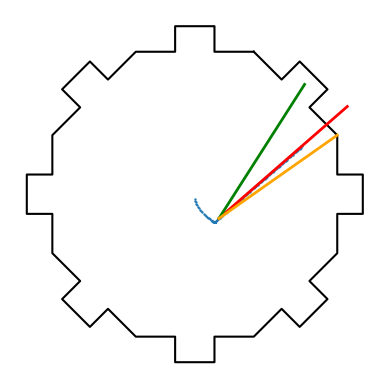

In [65]:
# example plotting head angle direction vector
start_index=60
# wall_index = 4
wall_index = int(get_indices.get_chosen_walls(trials_list)[trial_num] - 1)
x_start = trajectory[0,start_index]
y_start = trajectory[1,start_index]
x_gradient = trial_player_headangles_smoothed[0,start_index]
y_gradient = trial_player_headangles_smoothed[1,start_index]
x_gradient_alcove = player_to_alcove_vectors[0,wall_index,start_index]
y_gradient_alcove = player_to_alcove_vectors[1,wall_index,start_index]
x_gradient_closest_wall_section = player_to_closest_wall_section[0,wall_index,start_index]
y_gradient_closest_wall_section = player_to_closest_wall_section[1,wall_index,start_index] 

vector_length = 20

start = [x_start, y_start]
end_head_direction = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
end_wall_alcove = [x_start + x_gradient_alcove, y_start + y_gradient_alcove]
end_wall_section = [x_start + x_gradient_closest_wall_section, y_start + y_gradient_closest_wall_section]

head_direction_vector_coordinates = np.array(list(zip(start,end_head_direction)))
alcove_direction_vector_coordinates = np.array(list(zip(start,end_wall_alcove)))
closest_wall_section_vector_coordinates = np.array(list(zip(start,end_wall_section)))

ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)
ax.plot(head_direction_vector_coordinates[0,:], head_direction_vector_coordinates[1,:], c='r', linewidth=2)
ax.plot(alcove_direction_vector_coordinates[0,:], alcove_direction_vector_coordinates[1,:], c='g', linewidth=2)
ax.plot(closest_wall_section_vector_coordinates[0,:], closest_wall_section_vector_coordinates[1,:], c='orange', linewidth=2)

print(thetas_trajectory[wall_index,start_index], thetas_closest_wall_section[wall_index,start_index])

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

In [198]:
# display(Image("D:/Tom/Documents/SWC/repos/octagon_analysis/sandbox/images/top_down_recreation.png"))
# display(Image("C:/Users/tomha/repos/octagon_analysis/sandbox/images/top_down_recreation.png"))
# display(Image("/home/tom/repos/octagon_analysis/sandbox/images/top_down_recreation.png"))

In [199]:
# display(Image("D:/Tom/Documents/SWC/repos/octagon_analysis/sandbox/images/first_person_recreation.png"))
# display(Image("C:/Users/tomha/repos/octagon_analysis/sandbox/images/first_person_recreation.png"))
# display(Image("/home/tom/repos/octagon_analysis/sandbox/images/first_person_recreation.png"))

In [200]:
# display(Image("D:/Tom/Documents/SWC/repos/octagon_analysis/sandbox/images/first_person_recreation_stretching_example.png"))
# display(Image("C:/Users/tomha/repos/octagon_analysis/sandbox/images/first_person_recreation_stretching_example.png"))
# display(Image("/home/tom/repos/octagon_analysis/sandbox/images/first_person_recreation_stretching_example.png"))

In [201]:
thetas_closest_wall_section.shape

(8, 113)

In [223]:
# create a truth array of whether a wall is visible throughout the trajectory
thetas_closest_wall_section[:,60]

array([ 37.08067491,   5.96656623,   5.96656623,  57.4548727 ,
       114.63783678, 150.69330521, 112.34628368,  75.40349347])

In [203]:
thetas_closest_wall_section[:,10] < 45

array([False, False,  True,  True,  True, False, False, False])

In [204]:
wall_visible = thetas_closest_wall_section < 55.2

In [205]:
wall_visible[:,0]

array([False, False,  True,  True,  True, False, False, False])

In [206]:
wall1 = int(trial[globals.WALL_1].unique().item())
wall2 = int(trial[globals.WALL_2].unique().item())

In [207]:
wall1, wall2

(6, 2)

In [208]:
np.where(np.diff(wall_visible[wall1_index,:].astype(int)) == 1)[0].size

0

In [209]:
## WALL VISIBILITY ANALYSIS

In [210]:
# Create a wall visibility truth array for a trajectory by conditioning thetas on being < 45 + leeway
wall_visible = thetas_closest_wall_section < 55

In [211]:
def wall_visibility_player_slice_onset(wall_visible, trial):
    ''' Identify whether either of the relevant walls for this trial are visible at trial start '''

    # local variables for logic
    wall1_visible = False
    wall2_visible = False
    both_walls_visible = False
  
    # identify walls
    walls = get_indices.get_walls(trial=trial)
    wall1_index = walls[0] - 1
    wall2_index = walls[1] - 1

    # identify which walls are initially visible
    if wall_visible[wall1_index,0]:
        wall1_visible = True
    if wall_visible[wall2_index,0]:
        wall2_visible = True


    return wall1_visible, wall2_visible

    
    

In [212]:
def which_wall_becomes_visible_first(wall1_visible, wall2_visible, trial):
    ''' Return the wall that becomes visible first, to be run when the active walls are not
        both in view for a player at the start of a trial
        Input requires information about whether a wall starts as visible
        Which is retrieved from wall_visibility_player_slice_onset '''
    

    # local variables for logic
    wall1_becomes_visible = False
    wall2_becomes_visible = False
    both_walls_become_visible = False
    neither_wall_becomes_visible = False
    wall1_visible_first = False
    wall2_visible_first = False
    
    # get trial walls
    walls = get_indices.get_walls(trial=trial)
    wall1_index = walls[0] - 1
    wall2_index = walls[1] - 1
    
    # for each wall, check which index of the trial the wall became visible on
    # Or, if the wall never became visible, keep wall_becomes_visible as False
    if wall1_visible:
        wall1_becomes_visible = True
        visible_index_wall1 = 0
        print("wall1_already visible")
    else:
        # convert the boolean 'wall visible' array into an integer array, then use np.diff to compare
        # consecutive values for a difference.
        # If the array value ever changes from 0 to 1 there will be a diff of 1 at that timepoint
        # np.where then finds the index where this occurs
        # NB: the index value for a wall is wall_number - 1
        wall_visibility_change_wall1 = np.where(np.diff(wall_visible[wall1_index,:].astype(int)) == 1)[0]
        print(f"wall_vis for wall 1: {wall_visible[wall1_index,:].astype(int)}")
        print(f"wall vis change wall1: {wall_visibility_change_wall1}")
        if wall_visibility_change_wall1.size > 0:
            wall1_becomes_visible = True
            print("wall1_becomes_visible")
            visible_index_wall1 = wall_visibility_change_wall1[0] + 1
    
    if wall2_visible:
        wall2_becomes_visible = True
        visible_index_wall2 = 0
        print("wall2_already visible")
    else:
        wall_visibility_change_wall2 = np.where(np.diff(wall_visible[wall2_index,:].astype(int)) == 1)[0]
        print(f"wall_vis for wall 2: {wall_visible[wall2_index,:].astype(int)}")
        print(f"wall vis change wall2: {wall_visibility_change_wall2}")
        if wall_visibility_change_wall2.size > 0:
            wall2_becomes_visible = True
            print("wall2_becomes_visible")
            visible_index_wall2 = wall_visibility_change_wall2[0] + 1
    
    
    # check if both walls eventually become visible in the trial
    if wall1_becomes_visible and wall2_becomes_visible:
        both_walls_become_visible = True
        print("both walls become visible")
    
    # If both walls become visible, identify which became visible first
    if both_walls_become_visible == True:
        if visible_index_wall1 < visible_index_wall2:
            wall1_visible_first = True
            print("wall1 visible first")
        elif visible_index_wall2 < visible_index_wall1:
            wall2_visible_first = True
            print("wall2 visible first")
        else:
            print("wall visible indices are equal, or a logical error")
    # if no more than one wall ever becomes visible, identify it as the first visible wall
    elif wall1_becomes_visible == True and wall2_becomes_visible == False:
        wall1_visible_first = True
        print("wall1_visible_first")
    elif wall1_becomes_visible == False and wall2_becomes_visible == True:
        wall2_visible_first = True
        print("wall2_visible_first")
    # also account for neither wall becoming visible
    elif wall1_becomes_visible == False and wall2_becomes_visible == False:
        neither_wall_becomes_visible = True
    
    # now choose a return value: 'wall1' if wall1 becomes visible first, 'wall2' if wall2 becomes visible first, 'neither' if neither
    if wall1_visible_first:
        return 'wall1'
    elif wall2_visible_first:
        return 'wall2'
    elif neither_wall_becomes_visible:
        return 'neither'
    else:
        raise ValueError("Function logic has failed.")
        return None
        

In [213]:
def was_first_visible_wall_chosen(wall, trial):
    ''' Identifies if the first visible wall was also the chosen wall
        To be used in trials where one wall was visible to the player before the other
        Wall input currently accepts 'wall1' or 'wall2' '''

    # local variables
    if wall == 'wall1':
        df_wall_index = 'data.wall1'
    elif wall == 'wall2':
        df_wall_index = 'data.wall2'
    else:
        raise ValueError("wall parameter must take one of the values listed in the function docstring")

    # find the first wall visible
    first_wall_visible_index = int(trial[df_wall_index].unique().item())

    wall_triggered = trial[globals.WALL_TRIGGERED].unique()
    wall_triggered_filter_nans = wall_triggered[~np.isnan(wall_triggered)]
    wall_chosen_index = wall_triggered_filter_nans.item()

    if first_wall_visible_index == wall_chosen_index:
        print("first visible wall was the one chosen")
        first_visible_wall_chosen = True
    else:
        print("first visible wall was NOT the one chosen")
        first_visible_wall_chosen = False

    return first_visible_wall_chosen



In [214]:
# umbrella function for identifying if there was a first visible wall, whether it was the one chosen,
# and whether this was High or Low
def was_first_visible_wall_chosen_player(wall_visible, trial):
    ''' Umbrella function that identifies whether one wall became visible before the other, whether this wall
        was High, and then whether this first visible wall was chosen
        Returns bools first_visible_wall_chosen and first_visible_wall_high '''
    
    first_visible_wall = ''
    
    # identify which walls were visible at slice onset for this trial
    wall1_visible, wall2_visible = wall_visibility_player_slice_onset(wall_visible, trial)
        
    # if a single wall is visible, run through was_first_visible_wall_chosen
    if wall1_visible != wall2_visible:
        print("only one wall visible at trial start")
        if wall1_visible:
            print("and this was wall1")
            first_visible_wall = 'wall1'
            first_visible_wall_chosen = was_first_visible_wall_chosen('wall1', trial)
        elif wall2_visible:
            print("and this was wall2")
            first_visible_wall = 'wall2'
            first_visible_wall_chosen = was_first_visible_wall_chosen('wall2', trial)    
    
    # if both walls are visible, not relevant for this analysis
    if wall1_visible == True and wall2_visible == True:
        print("both walls visible")
        first_visible_wall_chosen = 777
        pass
    
    # if no walls are visible, identify when and which wall was first visible
    if wall1_visible == False and wall2_visible == False:
        first_visible_wall = which_wall_becomes_visible_first(wall1_visible, wall2_visible, trial)
        # account for neither wall becoming visible, then not relevant for this analysis
        if first_visible_wall == 'neither':
            print("neither wall becomes visible")
            first_visible_wall_chosen = 777
        # then run through was_first_visible_wall_chosen
        else:
            first_visible_wall_chosen = was_first_visible_wall_chosen(first_visible_wall, trial)


    # identify whether the first visible wall was high
    if first_visible_wall == 'wall1':
        first_visible_wall_high = True
    elif first_visible_wall == 'wall2':
        first_visible_wall_high = False
    else:
        first_visible_wall_high = 777

    
    return first_visible_wall_chosen, first_visible_wall_high

    

In [215]:
first_visible_wall_chosen, first_visible_wall_high = was_first_visible_wall_chosen_player(wall_visible, trial)

wall_vis for wall 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
wall vis change wall1: []
wall_vis for wall 2: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
wall vis change wall2: [17]
wall2_becomes_visible
wall2_visible_first
first visible wall was the one chosen


In [216]:
high_wall_chosen_array = get_indices.was_high_wall_chosen(trials_list)

In [217]:
high_wall_chosen_array[trial_num]

np.False_

In [218]:
first_visible_wall_chosen, first_visible_wall_high

(True, False)

In [219]:
# function to plot proportion of choosing High after first seeing low, against proportion of score in trial
    # find the final trial end and use the scores recorded to get proportion score